In [1]:
# import libraries

import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [19]:
path = r'C:\Users\nrsmi\Documents\CareerFoundry\20th_Century'

## 2. Import the country relationships file (that you created in the previous task) as a dataframe in a new notebook.

In [5]:
# Import relationship data

relationship_df = pd.read_csv('countries_relationship.csv', index_col = 0)

In [7]:
relationship_df

,source,target,value
0,Germany,United Kingdom,45
1,Germany,Russia,48
2,Germany,Italy,3
3,Italy,United Kingdom,6
4,Germany,United States,25
5,United Kingdom,United States,5
6,Russia,United States,51


## 3. Create a network object from the countries relationships dataframe.

In [9]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

## 4. Create a static network graph using only NetworkX.

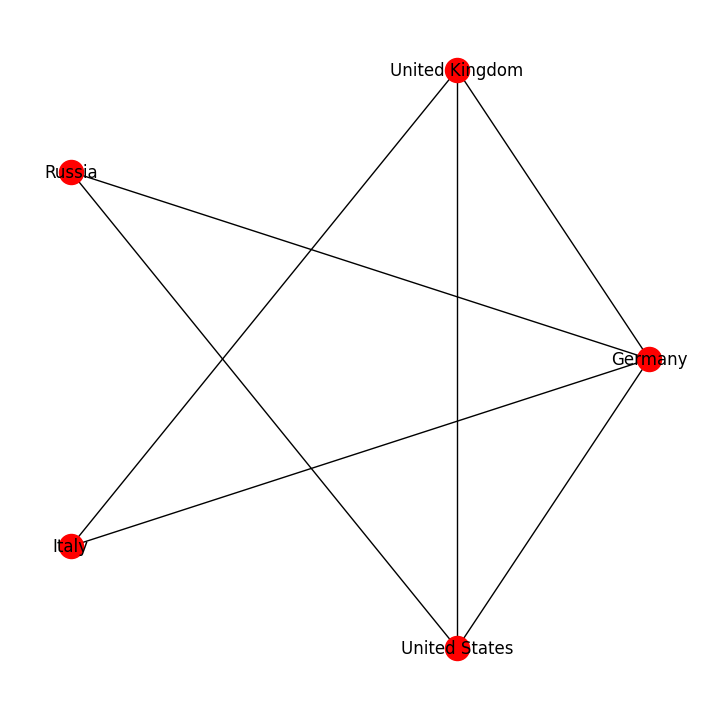

In [11]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [21]:
h.savefig(os.path.join(path, 'Visualizations', 'networkx_plt_20thCentury.png'))

## 5. Switch to pyvis, build an interactive network graph from your network object, and save it as an HTML file

In [27]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("20thCentury_network_graph.html")

20thCentury_network_graph.html


## 6. Apply the Leiden algorithm to detect any communities within the countries.

In [30]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'bayanpy', 'wurlitzer', 'infomap'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [32]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [34]:
new_com = coms.to_node_community_map()

In [36]:
new_com

defaultdict(list,
            {'Germany': [0],
             'United Kingdom': [0],
             'Italy': [0],
             'Russia': [1],
             'United States': [1]})

## 7. Visualize the output of the communities algorithm on a new network graph and save it as HTML. Write your observations in a Markdown cell. Does the partition make sense according to history? What other conclusions can you make about the connections between the communities?

In [38]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

dict_com

{'Germany': 0,
 'United Kingdom': 0,
 'Italy': 0,
 'Russia': 1,
 'United States': 1}

In [40]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20thCentury_network_graph_leiden.html")

20thCentury_network_graph_leiden.html


The network graph’s partition aligns well with historical events of the 20th century, grouping countries based on significant geopolitical relationships.  For example, Germany, the United Kingdom, and Italy are clustered together, which represents their interactions and roles during the World Wars. Similarly, Russia and the United States are grouped, accurately representing their Cold War rivalry and dominant influence on global affairs. Strong connections, such as between Russia and the United States, highlight significant historical dynamics, while weaker links, like Italy’s, suggest its relatively smaller role in the global politics of the time. Overall, the partition makes sense based on historical alliances, rivalries, and divides, offering a clear and insightful view of how countries interacted during this period.

## 8. Calculate and visualize the degree, closeness, and betweenness centrality measures covered in this Exercise. In the markdown cells underneath, note your observations about the outputs.

In [45]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'Germany': 1.0,
 'United Kingdom': 0.75,
 'Russia': 0.5,
 'Italy': 0.5,
 'United States': 0.75}

In [48]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['Country','centrality'])

In [50]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

In [54]:
degree_df

,Country,centrality
0,Germany,1.00
1,United Kingdom,0.75
4,United States,0.75
2,Russia,0.50
3,Italy,0.50


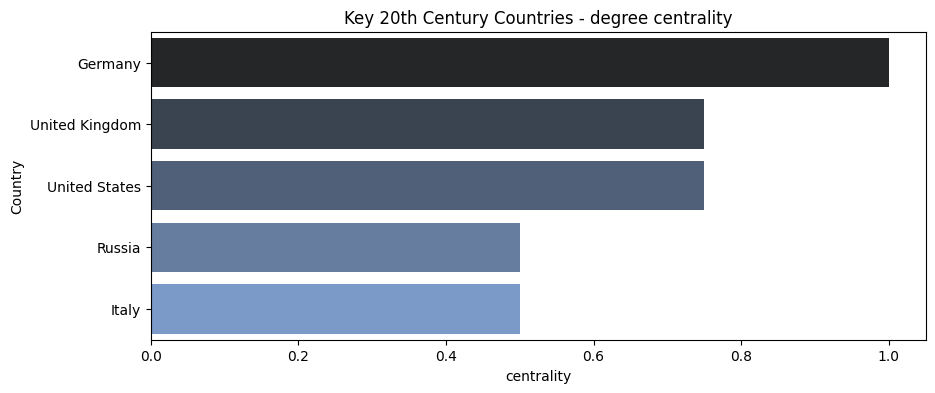

In [58]:
# Plot the degree centrality

plt.figure(figsize = (10, 4))
palette = sns.dark_palette("#79C", n_colors=len(degree_df), reverse=False)
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "Country", palette = palette,
    saturation = 0.9, data = degree_df).set_title("Key 20th Century Countries - degree centrality")

The degree centrality visualization shows that Germany is the most connected country, reflecting its central role in 20th-century global events, especially during the World Wars. The United Kingdom and the United States also have high centrality, highlighting their global influence and power during that time. Russia has moderate centrality, which aligns with its significant but focused connections during the Cold War. Italy has the lowest centrality, showing it played a smaller role in global interactions compared to the others. Overall, the results match historical patterns and highlight the relative importance of these countries during this time.